In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
fpath = "AMP_TRANSACTION_201808.csv"

txn_df = pd.read_csv(fpath, header=0)


In [3]:
txn_df.size

3962403

In [4]:
txn_df.head()


,ID,TRANS_TIME,TOTAL_TIME,SERVER_TIME,STATUS_ID,SHORT_DESC,COMMAND_ID,NAME,REQUEST_TYPE
0,4222263934,8/27/2018 8:00:00. AM,658,13,1,STAT_OK,8259,utilities/Journal/view,1
1,4222263940,8/27/2018 8:00:00. AM,279,28,1,STAT_OK,7798,utilities/Authorization/myWorklist,1
2,4222263946,8/27/2018 8:00:00. AM,189,18,1,STAT_OK,10024,datacollection/grWorkRequirement/edit,1
3,4222265952,8/27/2018 8:00:00. AM,242,81,1,STAT_OK,8122,edbc/CalWorksEdbc/viewCalWorks,1
4,4222265953,8/27/2018 8:00:00. AM,219,21,1,STAT_OK,8258,utilities/Journal/search,1


In [5]:
txn_df['TRANS_TIME'] = pd.to_datetime(txn_df['TRANS_TIME'])
txn_df.head()


,ID,TRANS_TIME,TOTAL_TIME,SERVER_TIME,STATUS_ID,SHORT_DESC,COMMAND_ID,NAME,REQUEST_TYPE
0,4222263934,2018-08-27 08:00:00,658,13,1,STAT_OK,8259,utilities/Journal/view,1
1,4222263940,2018-08-27 08:00:00,279,28,1,STAT_OK,7798,utilities/Authorization/myWorklist,1
2,4222263946,2018-08-27 08:00:00,189,18,1,STAT_OK,10024,datacollection/grWorkRequirement/edit,1
3,4222265952,2018-08-27 08:00:00,242,81,1,STAT_OK,8122,edbc/CalWorksEdbc/viewCalWorks,1
4,4222265953,2018-08-27 08:00:00,219,21,1,STAT_OK,8258,utilities/Journal/search,1


In [7]:
txn_df.size

3962403

In [35]:
txn_mean = pd.DataFrame(txn_df.groupby([pd.Grouper(key='TRANS_TIME', freq='1min')])['SERVER_TIME'].mean())
txn_count = pd.DataFrame(txn_df.groupby([pd.Grouper(key='TRANS_TIME', freq='1min')])['SERVER_TIME'].count())


In [36]:
type(txn_count)
txn_count.size
txn_mean.head()

,SERVER_TIME
TRANS_TIME,
2018-08-27 08:00:00,160.765140
2018-08-27 08:01:00,165.192548
2018-08-27 08:02:00,187.059565
2018-08-27 08:03:00,190.639134
2018-08-27 08:04:00,188.703322


In [37]:
txn_count.columns = ['TRANS_TIME', 'COUNT']
txn_mean.columns = ['TRANS_TIME', 'MEAN']
print(txn_mean.columns)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

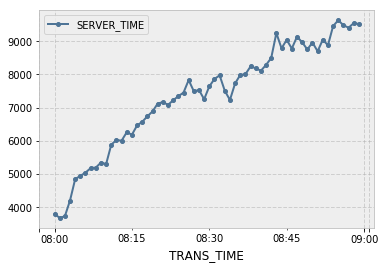

In [38]:
txn_count.plot();

In [44]:
print(txn_count.index)

DatetimeIndex(['2018-08-27 08:00:00', '2018-08-27 08:01:00',
               '2018-08-27 08:02:00', '2018-08-27 08:03:00',
               '2018-08-27 08:04:00', '2018-08-27 08:05:00',
               '2018-08-27 08:06:00', '2018-08-27 08:07:00',
               '2018-08-27 08:08:00', '2018-08-27 08:09:00',
               '2018-08-27 08:10:00', '2018-08-27 08:11:00',
               '2018-08-27 08:12:00', '2018-08-27 08:13:00',
               '2018-08-27 08:14:00', '2018-08-27 08:15:00',
               '2018-08-27 08:16:00', '2018-08-27 08:17:00',
               '2018-08-27 08:18:00', '2018-08-27 08:19:00',
               '2018-08-27 08:20:00', '2018-08-27 08:21:00',
               '2018-08-27 08:22:00', '2018-08-27 08:23:00',
               '2018-08-27 08:24:00', '2018-08-27 08:25:00',
               '2018-08-27 08:26:00', '2018-08-27 08:27:00',
               '2018-08-27 08:28:00', '2018-08-27 08:29:00',
               '2018-08-27 08:30:00', '2018-08-27 08:31:00',
               '2018-08-

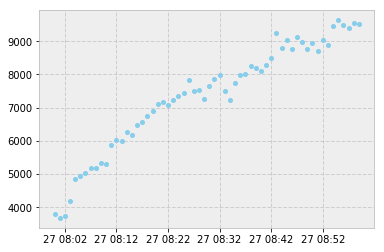

In [43]:
x = txn_count.index
y = txn_count.values
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_date(x, y, xdate=True, ydate=False, color='skyblue');

In [32]:
# This is not required with the above method. We get the index values (timestamps)
txn_count.reset_index(inplace=True)
txn_count.columns
txn_mean.reset_index(inplace=True)
txn_mean.columns


Index(['index', 'TRANS_TIME', 'SERVER_TIME'], dtype='object')

In [49]:
ninety_five_quantile = txn_count.quantile(.95)[0]
ninety_ninth_quantile = txn_count.quantile(.99)[0]
print(ninety_five_quantile, ninety_ninth_quantile)

9480.8 9578.67


TypeError: invalid type promotion

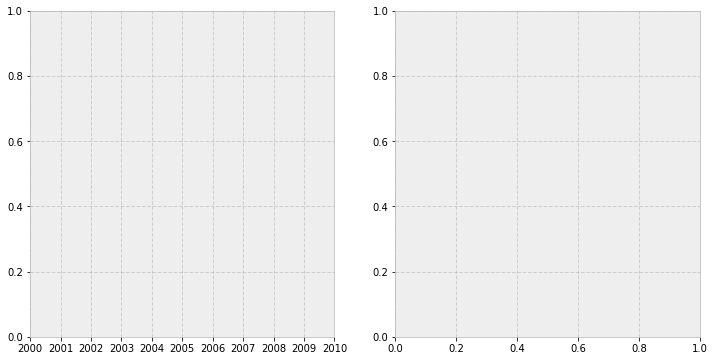

In [33]:
#txn_count.set_index('TRANS_TIME')


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax1.scatter(x=txn_count['TRANS_TIME'], y=txn_count['SERVER_TIME'])
ax2.scatter(x=txn_mean['TRANS_TIME'], y=txn_mean['SERVER_TIME'])
plt.show()

In [ ]:
commands = perf_data["NAME"]
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ax1.scatter(x = x, y = y, marker = 'o', c = 'r', edgecolor = 'r')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('Scatter: $x$ versus $y$')

ax2.hist(data, bins = np.arange(data.min(), data.max()), label = ('x', 'y'))
ax2.legend(loc = (0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

In [ ]:
fig, ax = plt.subplots()
ax.hist(perf_data["NAME"], bins="auto")
ax.set_title("Histogram of commands")

plt.show()


In [ ]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ax1.scatter(x = x, y = y, marker = 'o', c = 'r', edgecolor = 'r')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('Scatter: $x$ versus $y$')

ax2.hist(data, bins = np.arange(data.min(), data.max()), label = ('x', 'y'))
ax2.legend(loc = (0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

### New cells to manipulate time series



In [ ]:
# Timeseries Dataframe to a Series with groupby
pan.groupby(pan.Time).mean()

# Option 1 with TimeGrouper
df.set_index('Time', inplace=True)
# Taking mean values for a frequency of 2 minutes
df_group = df.groupby(pd.TimeGrouper(level='Time', freq='2T'))['Value'].agg('mean')   
df_group.dropna(inplace=True)
df_group = df_group.to_frame().reset_index()
print(df_group)

# Option 2 with resample()
print(df.set_index('Time').resample('2T').mean().dropna().reset_index())